# Computational Activity \#5

## PHYS 210, Fall 2024

Today's computational exercise introduces a topic we'll explore in much more detail in PHYS 224 next semester and review in PHYS 310: *Fourier series*. The goal today is to give you some exposure to and experience with this topic before diving into the details later; today's activity is in no way intended to be comprehensive.

What is a Fourier series, and why should you care? In words, the basic idea is that you can represent almost any periodic function (of position or time) as the sum of sinuosidal functions. Incredibly, this works even if the periodic function is *not* continuous or differentiable everywhere (even though sinusoids are continuous and differentiable everywhere). In a physics and/or engineering context, the reason Fourier series are useful is that very often, it is (relatively) easy to predict the response of a physical system (such as a mechanical oscillator or electrical circuit) to sinusoidal inputs. Fourier series then allow predictions to be made for periodic (but non sinusoidal) inputs.

One concrete example may be useful, particularly if you are a musician. Bow a violin or blow into a flute or trumpet -- and the sound that emerges cannot be described as a pure sine wave. Rather, you'll hear both a fundamental and overtones -- in other words, a combination of sinusoids at different frequencies. Fourier series describe how different sinuosoids combine to give the different timbres we associate with different musical instruments.

We'll first take a foray into loops, and specifically `for` loops, which will be useful in the exercise.

## Part 1: loops

Begin by getting the usual imports out of the way:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Many of you will have learned about loops -- a way to repeatedly execute a set of instructions over and over again -- in a previous computer science course. If you have never worked with loops in Python, we recommend the following short video:

<https://youtu.be/dHANJ4l6fwA?si=jY12YxDyQDjgMxyk>

One comment: `range` can also be used in more complex ways. See the documentation and examples below, particularly regarding arbitrary start, stop, and step values:

<https://docs.python.org/3/library/stdtypes.html#typesseq-range>

### ***EXERCISE 1***

In the code cell below, write a for loop that counts backwards from 20 to 0 by twos, printing each value.

## Part 2: the sawtooth wave

Let's consider the following *sawtooth wave*, which we'll define as

$$ f(t) = t \ \ \mathrm{if} \ -1 < x \le 1$$

and which we'll periodically extend outside the interval. The code below plots this function:

Text(0, 0.5, '$f(t)$')

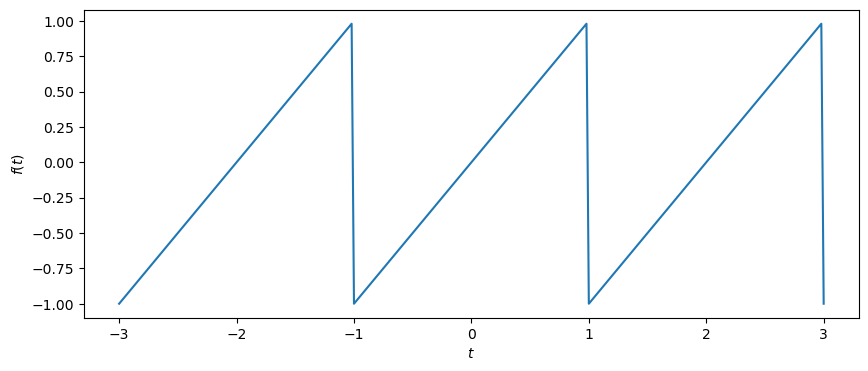

In [2]:
t = np.linspace(-3, 3, 301)

def sawtooth(t):
    return (t + 1) % 2 - 1 # % is the modulus operator in Python; look up documentation to see how this works

plt.figure(figsize = (10, 4))
plt.plot(t, sawtooth(t))
plt.xlabel(r'$t$')
plt.ylabel(r'$f(t)$')

Notice that this function is discontinuous (and therefore, not differentiable) at the edges ($t=\ldots, -3, -1, 1, 3, \ldots$). Nevertheless, it has a Fourier series. Specifically, it turns out that

$$f(t) = \sum_{n=1}^\infty \frac{2(-1)^{n+1}}{n\pi} \sin(n\pi t).$$

For clarity's sake, writing out the first few terms of this expression gives

$$f(t) = \frac{2}{\pi}\sin(\pi t) - \frac{2}{2\pi}\sin(2\pi t) + \frac{2}{3\pi} \sin(3\pi t) - \frac{2}{4\pi} \sin(4\pi t) + \ldots$$

(After completing PHYS 224, you will be able to figure out where this expression comes from.)

But does this really work? Here's where the computational skills you've learned come in handy!

### ***EXERCISE 2***

Complete the code below to plot (as separate lines on the same graph) the following partial sums of the Fourier series for $f(t)$ above:

* The first term only (we've templated this for you)
* The sum of the first two terms
* The sum of the first three terms
* The sum of the first four terms

For now, do this by coding up each term "by hand."

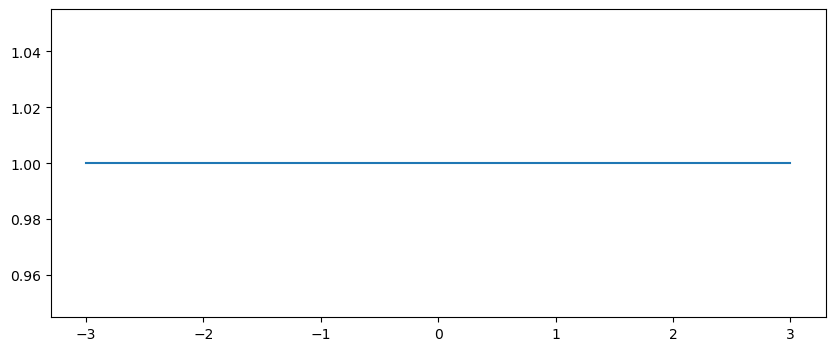

In [3]:
t = np.linspace(-3, 3, 301)

plt.figure(figsize = (10, 4))
plt.plot(t, np.ones(len(t))) # fix this line to plot the first term only
# then write three additional lines to plot the remaining partial sums


Hopefully, even adding just the first few terms makes it *plausible* that the complete infinite series really does give a sawtooth wave. It should also be clear that proceeding "by hand" would be tedious and impractical if we wanted to plot more than the first few terms. This sort of repeated task is perfect for a loop, however!

### ***EXERCISE 3***

Modify the code below to plot the sum of the first 5 terms in the Fourier series for $f(t)$ for the sawtooth wave above.


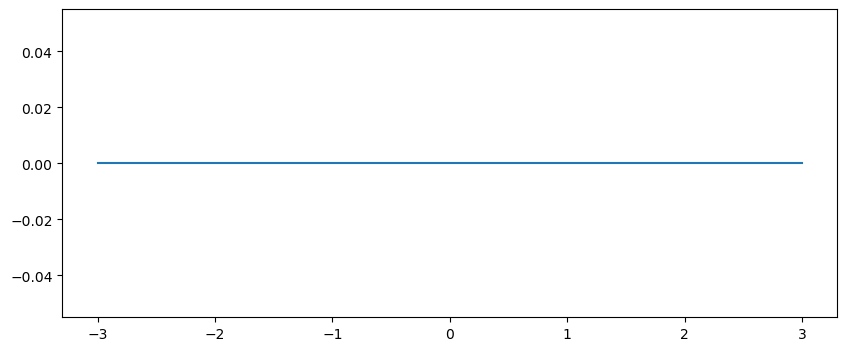

In [4]:
t = np.linspace(-3, 3, 601) # increase density of plot points to make the graphs prettier

plt.figure(figsize = (10, 4))

partial_sum = np.zeros(len(t)) # initialize an empty array of 0s

for n in range(1, 1): # fix this line
    nth_term = np.ones(len(t)) # modify this line too
    partial_sum = partial_sum + nth_term

plt.plot(t, partial_sum)

Now that you've gotten the looped version working, you can explore what happens when you include even more terms. You can perform the exercise below either by writing several nearly-identical for loops, or by defining a function that takes as an argument the maximum number of terms to plot.

### ***EXERCISE 4***

In the code cell below, plot the following partial sums of terms in the Fourier series for $f(t)$ for the sawtooth wave:

* The sum of the first 10 terms
* The sum of the first 20 terms
* The sum of the first 50 terms
* The sum of the first 100 terms

Plot each sum as a separate line on the same graph.

While this isn't a mathematical proof, hopefully you are now convinced that the Fourier series really does add up to give a sawtooth wave. We'll learn more about how to calculate Fourier series for this function (and other periodic functions, such as square waves) next semester.